In [158]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 训练数据准备

In [159]:
data=pd.read_csv('CarPrice_Assignment.csv')

# 保留需要计算的维度
train_x= data.drop(['car_ID','CarName'],axis=1)

# 离散数据处理
# LabelEncoder
le = LabelEncoder()
category_columns=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
for column in category_columns:
    train_x[column] = le.fit_transform(train_x[column])

# 规范化到 [0,1] 空间
min_max_scaler=preprocessing.MinMaxScaler()
train_x=min_max_scaler.fit_transform(train_x)
# pd.DataFrame(train_x).to_csv('temp.csv', index=False)

### K值选取

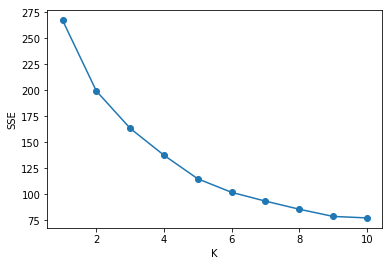

In [160]:
# K-Means 手肘法：
# 统计不同K取值的误差平方和
sse = []
for k in range(1, 11):
    # kmeans算法
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train_x)
    # 计算inertia簇内误差平方和
    sse.append(kmeans.inertia_)
x = range(1, 11)
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(x, sse, 'o-')
plt.show()

### Kmeans聚类计算

In [161]:
# 使用KMeans聚类 k选5或6  
kmeans=KMeans(n_clusters=6)
kmeans.fit(train_x)
predict_y=kmeans.predict(train_x)
data['result']=predict_y
data.to_csv('trained_resutl.csv')

In [162]:
df=data[['CarName','result']]

In [163]:
df.head()

,CarName,result
0,alfa-romero giulia,1
1,alfa-romero stelvio,1
2,alfa-romero Quadrifoglio,1
3,audi 100 ls,3
4,audi 100ls,3


### VW竞品分析

In [164]:
# 包含VW品牌名称的车型  所有车型分6类 VW品牌占据4类
df[df['CarName'].str.contains('volkswagen|vw')].sort_values('result')

,CarName,result
191,volkswagen rabbit,0
189,vw dasher,1
190,vw rabbit,1
184,volkswagen model 111,2
187,volkswagen super beetle,2
192,volkswagen rabbit custom,2
185,volkswagen type 3,3
186,volkswagen 411 (sw),3
188,volkswagen dasher,3
193,volkswagen dasher,3


In [169]:
# 竞品分析  按VW所在的4类进行竞品分析
L=[]
for i in [0,1,2,3,5]:    
    ser=df[df['result']==i]['CarName']
#     将每类中VW和其他竞品车型区分开
    competitor_lst=ser[~ser.str.contains('vw|volkswagen')].tolist()   
    VW_models=ser[ser.str.contains('vw|volkswagen')].tolist()
    competitors=','.join(competitor_lst)
    vw=','.join(VW_models)
    car_category= i
    L.append([car_category,vw,competitors])

In [170]:
VW_competitors=pd.DataFrame(L,columns=['category','VW_models','competiors'])

In [171]:
VW_competitors

,category,VW_models,competiors
0,0,volkswagen rabbit,"audi 100ls,audi 5000,audi 4000,bmw 320i,bmw x3..."
1,1,"vw dasher,vw rabbit","alfa-romero giulia,alfa-romero stelvio,alfa-ro..."
2,2,"volkswagen model 111,volkswagen super beetle,v...","mazda glc deluxe,mazda rx-7 gs,buick electra 2..."
3,3,"volkswagen type 3,volkswagen 411 (sw),volkswag...","audi 100 ls,audi 100ls,chevrolet vega 2300,dod..."
4,5,volkswagen 1131 deluxe sedan,"chevrolet impala,chevrolet monte carlo,dodge r..."


In [172]:
VW_competitors.to_csv('VW_competitors.csv')